In [87]:
from Scripts.helpers import *

In [19]:
# Will initialize files and rebuild database from scratch
# db = InspectionDatabase(True)


db = InspectionDatabase()

# Corrective Actions
<hr>

## Reasons for Correction
- Incorrect model values
- Hand measurement adjustments
- Movement of part during inspection
- Features not required
- Inconsistent drafting practices

In [42]:
# # Model value correction
db.planes.df.loc[(db.planes.df.inspection_id == '132374-GASS-MFG-TEB_QC1.csv') & 
                 (db.planes.df.feature == 'plane 1'), 'x_nom'] = .4530

db.planes.df.loc[(db.planes.df.inspection_id == '132374-GASS-MFG-TEB_QC1.csv') & 
                 (db.planes.df.feature == 'plane 1'), 'x_dev'] = .0001


# Hand measurement correction
db.cylinders.df.loc[(db.cylinders.df.inspection_id == '133275-INSS-MFG-B_QC1.csv') & 
                    (db.cylinders.df.feature == 'datum cylinder B'), 'diameter_meas'] = 5.4943

db.cylinders.df.loc[(db.cylinders.df.inspection_id == '133275-INSS-MFG-B_QC1.csv') & 
                    (db.cylinders.df.feature == 'datum cylinder B'), 'diameter_dev'] = .0013


# Potential movement of part correction
db.cylinders.df.loc[(db.cylinders.df.inspection_id == '132164-SESL-MFG-TE_QC1.csv') & 
                    (db.cylinders.df.feature == 'cylinder 1'), 'total_runout_ab'] = np.nan

db.cylinders.df.loc[(db.cylinders.df.inspection_id == '132164-SESL-MFG-TE_QC1.csv') & 
                    (db.cylinders.df.feature == 'cylinder 2'), 'total_runout_ab'] = np.nan

db.cylinders.df.loc[(db.cylinders.df.inspection_id == '132164-SESL-MFG-TE_QC1.csv') & 
                    (db.cylinders.df.feature == 'cylinder 3'), 'total_runout_ab'] = np.nan

db.cylinders.df.loc[(db.cylinders.df.inspection_id == '132674-INSS-MFG-C.csv') & 
                    (db.cylinders.df.feature == 'cylinder 1'), 'total_runout_ab'] = np.nan

db.cylinders.df.loc[(db.cylinders.df.inspection_id == '132674-INSS-MFG-C.csv') & 
                    (db.cylinders.df.feature == 'cylinder 2'), 'total_runout_ab'] = np.nan

db.cylinders.df.loc[(db.cylinders.df.inspection_id == '132674-INSS-MFG-C.csv') & 
                    (db.cylinders.df.feature == 'cylinder 3'), 'total_runout_ab'] = np.nan

db.cylinders.df.loc[(db.cylinders.df.inspection_id == '132674-INSS-MFG-C.csv') & 
                    (db.cylinders.df.feature == 'cylinder 4'), 'total_runout_ab'] = np.nan


# Relief was probed, should not be recorded as diameter
db.cylinders.df.drop(db.cylinders.df[(db.cylinders.df.inspection_id == '132279-INSS-MFG-C_QC1.csv') &
                                    (db.cylinders.df.feature == 'cylinder 5')].index, inplace=True)

db.cylinders.df.drop(db.cylinders.df[(db.cylinders.df.inspection_id == '133275-INSS-MFG-A_QC1.csv') &
                                    (db.cylinders.df.feature == 'cylinder 4')].index, inplace=True)
 

# Remove features related to inconsistent drafting practices so that data is not skewed
db.cylinders.df.drop(db.cylinders.df[(db.cylinders.df.inspection_id == '132374-GASS-MFG-NTEB_QC1.csv') &
                                    (db.cylinders.df.feature == 'cylinder 2')].index, inplace=True)

db.cylinders.df.drop(db.cylinders.df[(db.cylinders.df.inspection_id == '132374-GASS-MFG-NTEC_QC1.csv') &
                                    (db.cylinders.df.feature == 'cylinder 1')].index, inplace=True)

db.cylinders.df.drop(db.cylinders.df[(db.cylinders.df.inspection_id == '132374-GASS-MFG-TEB_QC1.csv') &
                                    (db.cylinders.df.feature == 'cylinder 2')].index, inplace=True)

db.cylinders.df.drop(db.cylinders.df[(db.cylinders.df.inspection_id == '132374-GASS-MFG-TEC_REV0_QC1.csv') &
                                    (db.cylinders.df.feature == 'cylinder 1')].index, inplace=True)

db.cylinders.df.drop(db.cylinders.df[(db.cylinders.df.inspection_id == '132377-GASS-MFG-CETEC_QC1.csv') &
                                    (db.cylinders.df.feature == 'cylinder 1')].index, inplace=True)

db.cylinders.df.drop(db.cylinders.df[(db.cylinders.df.inspection_id == '132377-GASS-MFG-NTEC_QC1.csv') &
                                    (db.cylinders.df.feature == 'cylinder 1')].index, inplace=True)

db.cylinders.df.drop(db.cylinders.df[(db.cylinders.df.inspection_id == '132377-GASS-MFG-TEC_QC1.csv') &
                                    (db.cylinders.df.feature == 'cylinder 1')].index, inplace=True)


# Update
# db.planes.serialize()
# db.cylinders.serialize()



# Get seal sleeve data only
planes, cylinders, points = db.parts_only_set(['INSS', 'GASS', 'SESL'])

# Planes
<hr>

In [43]:
# Split planes by category
A, shoulders, midplanes = db.plane_split(planes)

Number of parts: 67
Acceptance rate: 95.522 %
Tolerance: +0.001 / -0.0
Conformity: 98.473 %


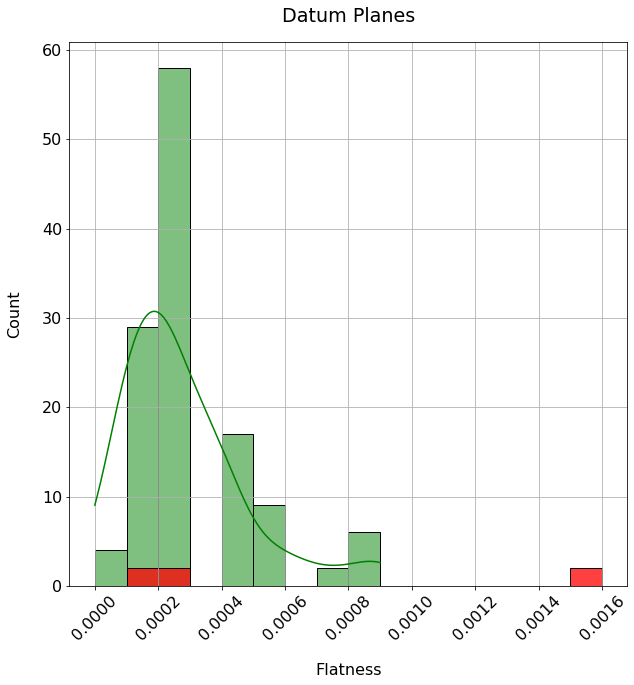

In [44]:
db.hist(df=A, feature='flatness', title='Datum Planes', xlabel='Flatness', 
        include_decision=True, binwidth=.0001, upper_bound=.001)

Number of parts: 66
Acceptance rate: 95.455 %
Tolerance: +0.003 / -0.0
Conformity: 100.0 %


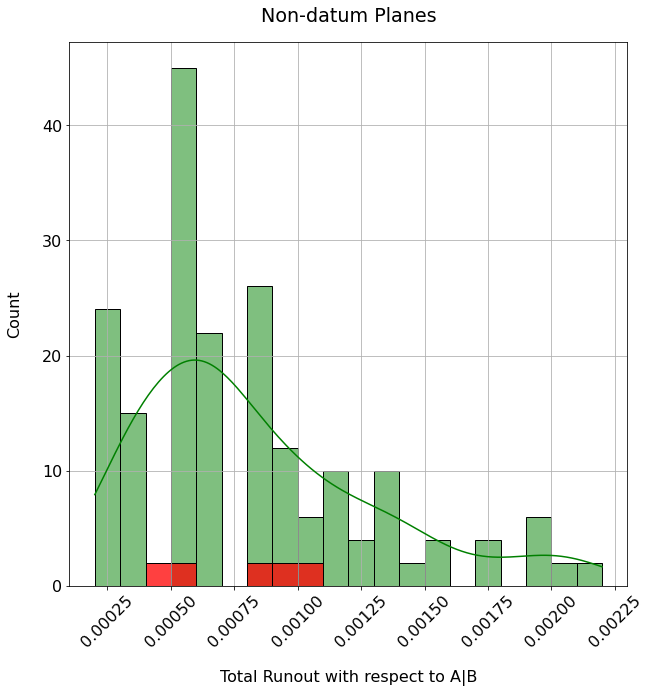

In [45]:
db.hist(df=shoulders, feature='total_runout_ab', title='Non-datum Planes', 
        xlabel='Total Runout with respect to A|B', include_decision=True, 
        binwidth=.0001, upper_bound=.003)

Number of parts: 66
Acceptance rate: 95.455 %
Tolerance: +0.001 / -0.0
Conformity: 98.077 %


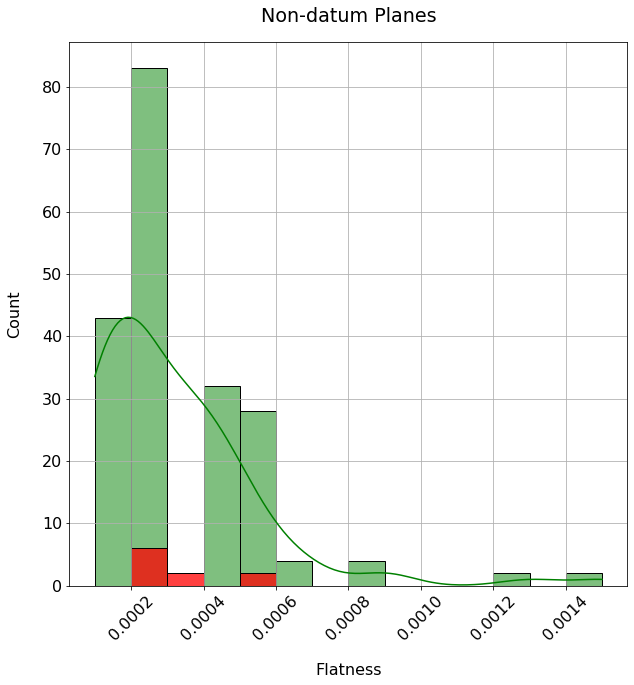

In [46]:
db.hist(df=shoulders, feature='flatness', title='Non-datum Planes', xlabel='Flatness', 
        include_decision=True, upper_bound=.001)

Number of parts: 65
Acceptance rate: 95.385 %
Tolerance: +0.002 / -0.002
Conformity: 88.35 %


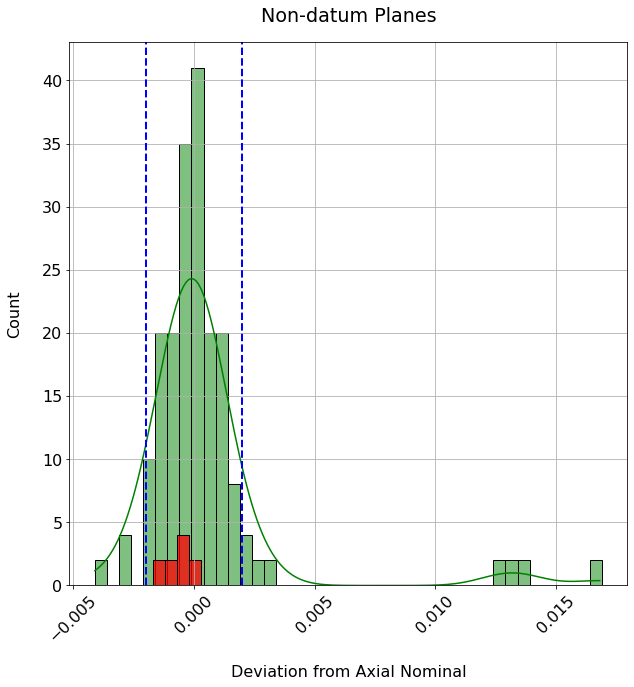

In [47]:
db.hist(shoulders, 'x_dev', 'Non-datum Planes', 'Deviation from Axial Nominal', True, 
        binwidth=.0005, upper_bound=.002, lower_bound=-.002, show_bounds=True)

# Cylinders
<hr>

In [48]:
# Split cylinders by category
B, C, radials, holes = db.cylinder_split(cylinders)

Number of parts: 67
Acceptance rate: 95.522 %
Tolerance: +0.002 / -0.0
Conformity: 100.0 %


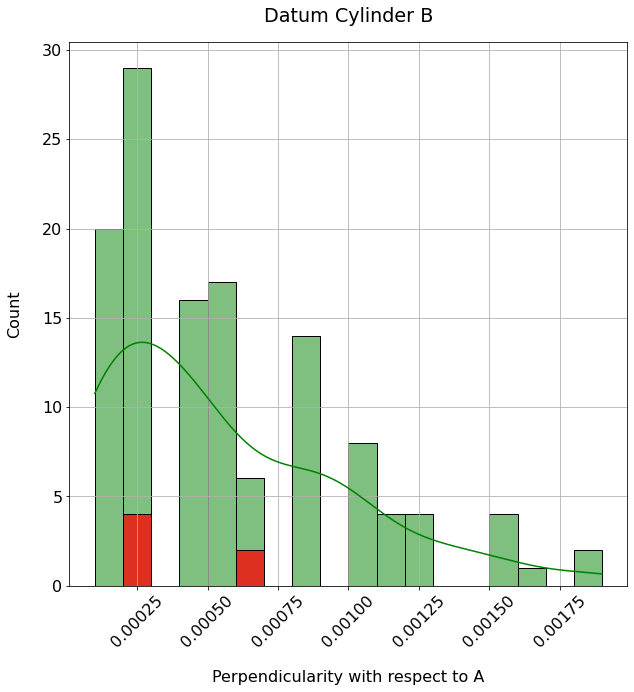

In [27]:
db.hist(df=B, feature='perpendicular_a', title='Datum Cylinder B', xlabel='Perpendicularity with respect to A', 
        include_decision=True, upper_bound=.002)

Number of parts: 67
Acceptance rate: 95.522 %
Tolerance: +0.001 / -0.0
Conformity: 93.893 %


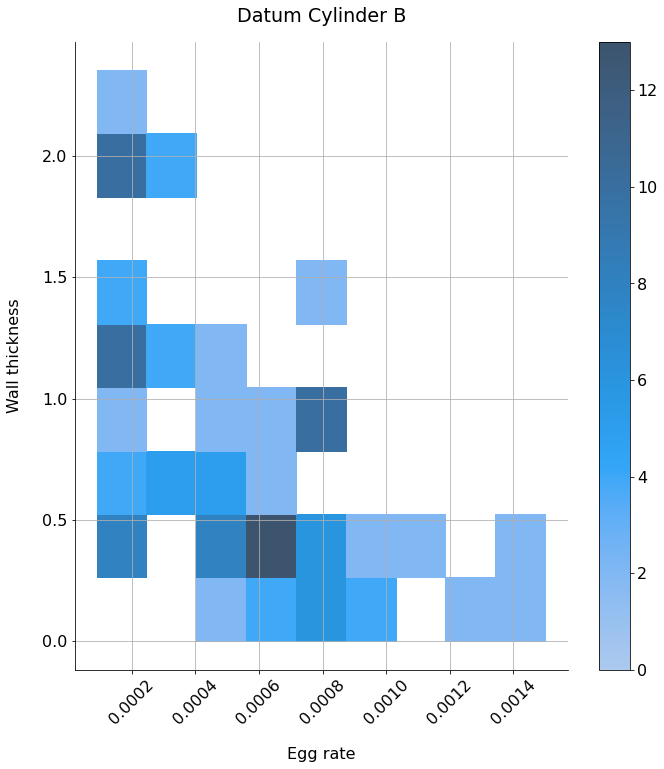

In [28]:
B_with_wall = db.get_B_with_wall(B, cylinders)
db.bivarplot(df=B_with_wall, x='egg_rate', y='wall_thickness', title='Datum Cylinder B', xlabel='Egg rate', 
             ylabel='Wall thickness', upper_bound=.001)

Number of parts: 64
Acceptance rate: 100.0 %


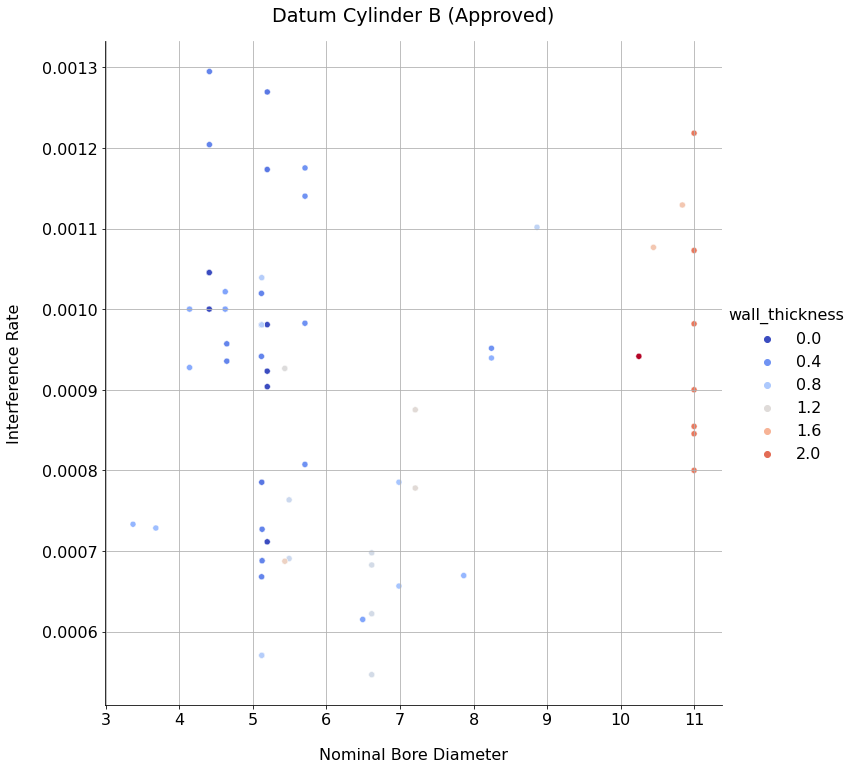

In [29]:
B_with_wall_appr = db.drop_rejections(B_with_wall)
B_with_intf_rate_appr = db.get_B_with_intf_rate(B_with_wall_appr)

db.scatter(df=B_with_intf_rate_appr, x='diameter_nom', y='intf_rate', title='Datum Cylinder B (Approved)', 
           xlabel='Nominal Bore Diameter', ylabel='Interference Rate', 
           representation='auto_hue', hue_target='wall_thickness')

Number of parts: 64
Acceptance rate: 100.0 %
Tolerance: +0.001 / -0.0
Conformity: 34.4 %


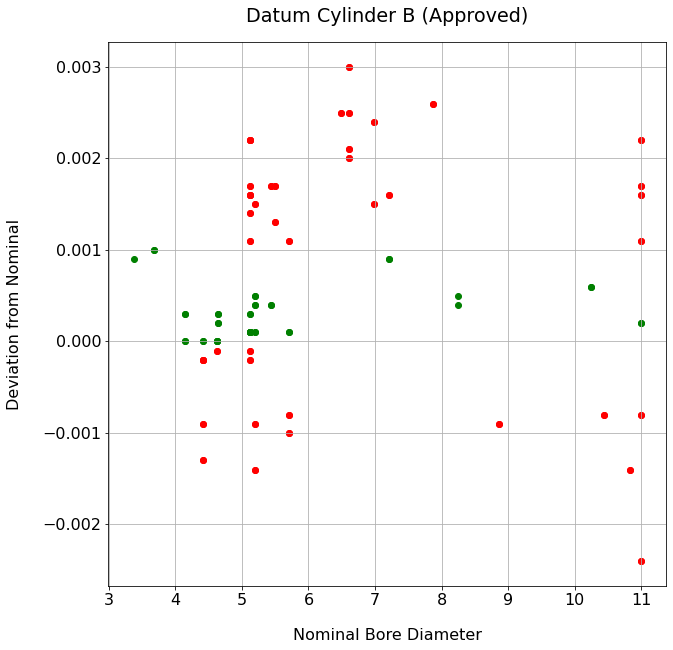

In [30]:
db.scatter(df=B_with_intf_rate_appr, x='diameter_nom', y='diameter_dev', title='Datum Cylinder B (Approved)', 
           xlabel='Nominal Bore Diameter', ylabel='Deviation from Nominal', 
           representation='test', upper_bound=.001, test_var='diameter_dev')

Number of parts: 64
Acceptance rate: 100.0 %


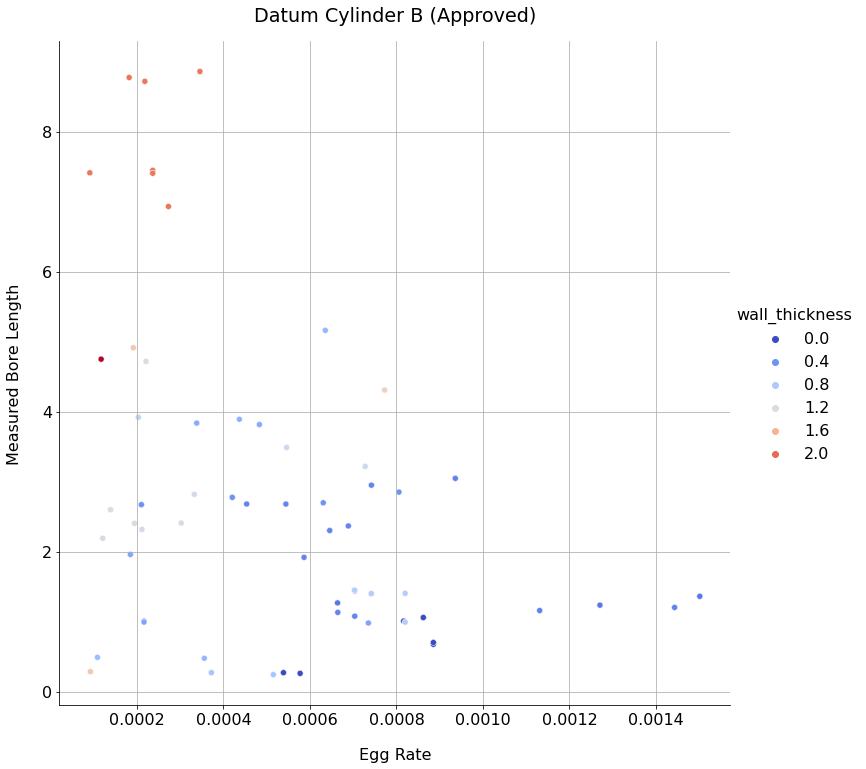

In [31]:
db.scatter(df=B_with_intf_rate_appr, x='egg_rate', y='length_meas', title='Datum Cylinder B (Approved)', 
           xlabel='Egg Rate', ylabel='Measured Bore Length', 
           representation='auto_hue', hue_target='wall_thickness')

Number of parts: 60
Acceptance rate: 95.0 %
Tolerance: +0.003 / -0.0
Conformity: 82.7 %


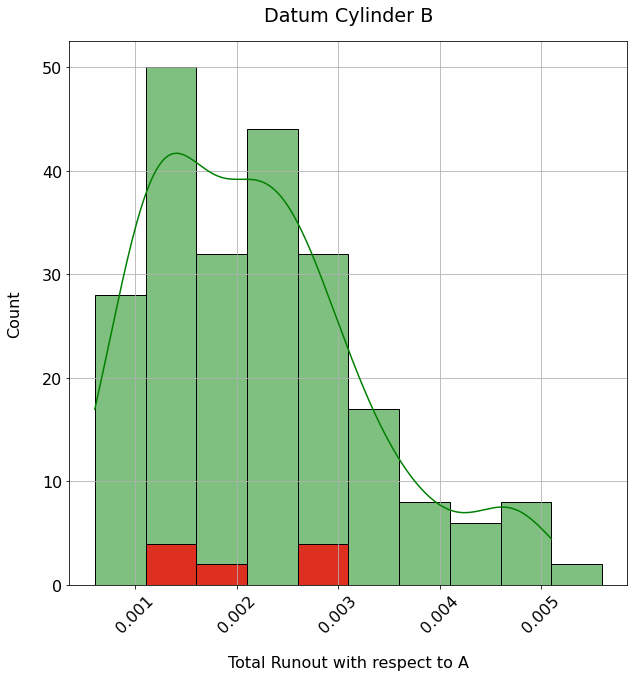

In [32]:
db.hist(df=radials, feature='total_runout_ab', title='Datum Cylinder B', 
        xlabel='Total Runout with respect to A', include_decision=True, 
        binwidth=.0005, upper_bound=.003)

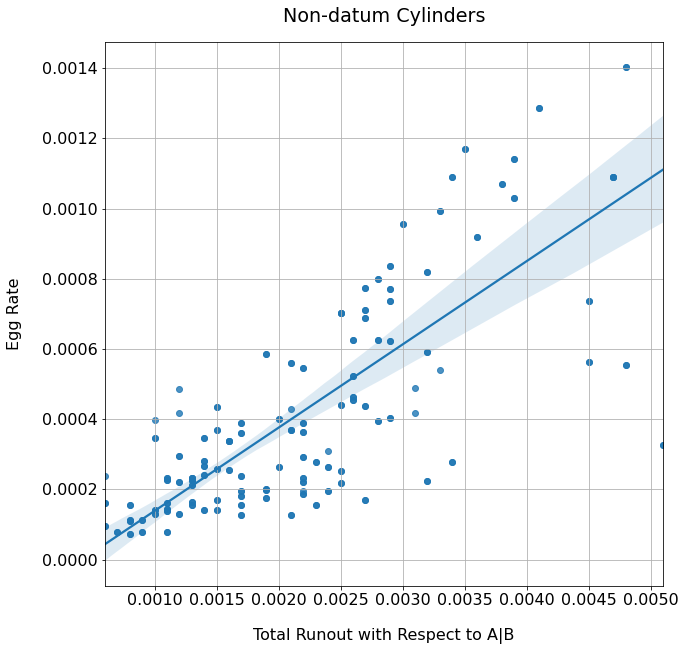

In [33]:
sns.regplot(x='total_runout_ab', y='egg_rate', data=radials, robust=True)
plt.xlabel('Total Runout with Respect to A|B')
plt.ylabel('Egg Rate')
plt.title('Non-datum Cylinders')
plt.show()

Number of parts: 62
Acceptance rate: 95.161 %
Tolerance: +0.002 / -0.002
Conformity: 60.618 %


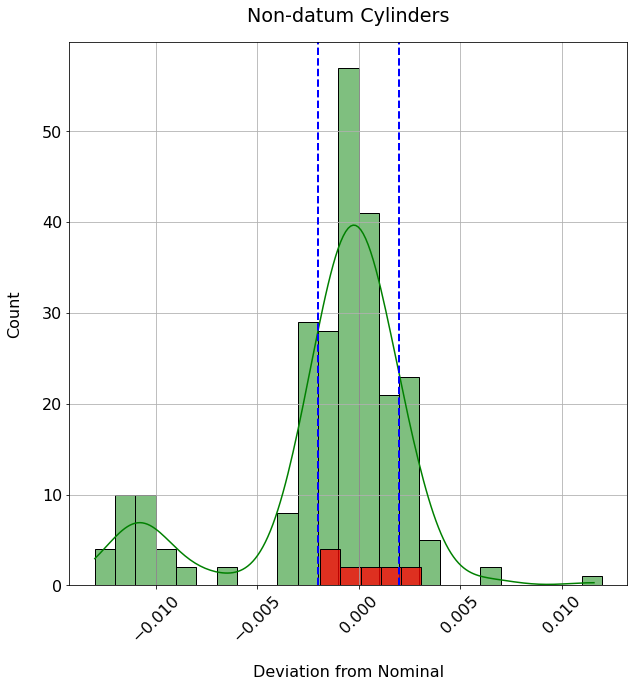

In [36]:
db.hist(df=radials, feature='diameter_dev', title='Non-datum Cylinders', xlabel='Deviation from Nominal', 
        include_decision=True, binwidth=.001, upper_bound=.002, lower_bound=-.002, show_bounds=True)

In [91]:
test = radials[(~radials.cylindricity.isna()) & (~radials.total_runout_ab.isna())]

bias, slope = np.polynomial.polynomial.polyfit(
    np.asarray(test.cylindricity.tolist()), 
    np.asarray(test.total_runout_ab.tolist()), 
    1)

In [92]:
bias, slope

(0.0005262774869207853, 1.1863915081255376)

In [94]:
def total_runout(cylindricity):
    return slope*cylindricity + bias

In [95]:
total_runout(.001)

0.001712668995046323

In [96]:
total_runout(.002)

0.0028990605031718607

In [97]:
total_runout(.012)

0.014762975584427237

<IPython.core.display.Javascript object>


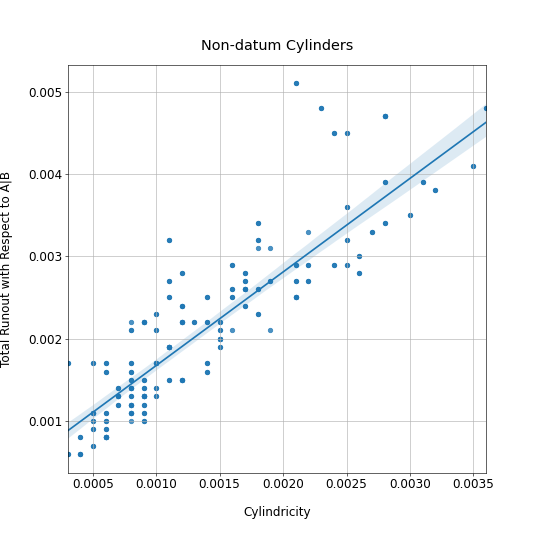

In [89]:
sns.regplot(x='cylindricity', y='total_runout_ab', data=test, robust=True)
plt.xlabel('Cylindricity')
plt.ylabel('Total Runout with Respect to A|B')
plt.title('Non-datum Cylinders')
plt.show()

In [86]:
# X = np.asarray(test.cylindricity.tolist())
# Y = np.asarray(test.total_runout_ab.tolist())
# Z = np.asarray(test.diameter_nom.tolist())



# %matplotlib notebook
# import matplotlib

# ax = matplotlib.pyplot.figure().add_subplot(111, projection='3d')
# ax.scatter(X, Y, Z)
# matplotlib.pyplot.show()